<a href="https://colab.research.google.com/github/Gaurav1401/Innomatics_Internship_APR_21/blob/main/Task%20-%2011%20(EDA%20Missing%20Value%20Outlier%20ML%20Model)/FeatureSelection_Boosting_Loading_MlModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import cross_val_score

In [3]:
from joblib import dump, load

In [4]:
import warnings as wg
wg.filterwarnings('ignore')

In [5]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [6]:
# This version supports oversampling
# !pip install scikit-learn==0.22.2.post1

Since, this version of sklearn supports oversampling on Colab

In [7]:
import sklearn

sklearn.__version__

'0.22.2.post1'

In [8]:
df_3 = pd.read_csv('original_df.csv')
test =  pd.read_csv('test_encod.csv')

In [9]:
df_3.columns

Index(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income', 'workclass_Private',
       'workclass_Self-emp', 'marital-status_Married',
       'marital-status_Separated', 'marital-status_Unmarried',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Prof-specialty', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving', 'race_Other',
       'race_White'],
      dtype='object')

In [10]:
x_train = df_3.drop('income', axis = 'columns')
y_train = df_3['income']

In [11]:
x_test = test.drop('income', axis = 'columns')
y_test = test['income']

In [12]:
y_train.value_counts()

0    26394
1     8750
Name: income, dtype: int64

In [13]:
y_test.value_counts()

0    7129
1    2267
Name: income, dtype: int64

In [14]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)

In [ ]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rfc.predict(x_test)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.546896363139185

In [ ]:
print(classification_report(y_test,rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7129
           1       0.72      0.44      0.55      2267

    accuracy                           0.82      9396
   macro avg       0.78      0.69      0.72      9396
weighted avg       0.81      0.82      0.81      9396



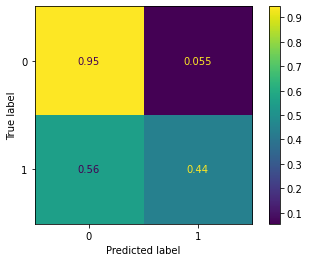

In [ ]:
plot_confusion_matrix(rfc, x_test, y_test, normalize='true')  
plt.show()

# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(classification_report(y_test,svc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7129
           1       0.71      0.60      0.65      2267

    accuracy                           0.85      9396
   macro avg       0.80      0.76      0.78      9396
weighted avg       0.84      0.85      0.84      9396



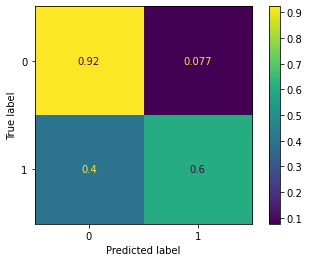

In [ ]:
plot_confusion_matrix(svc, x_test, y_test, normalize='true')  
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(classification_report(y_test,lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7129
           1       0.71      0.59      0.65      2267

    accuracy                           0.84      9396
   macro avg       0.80      0.76      0.77      9396
weighted avg       0.84      0.84      0.84      9396



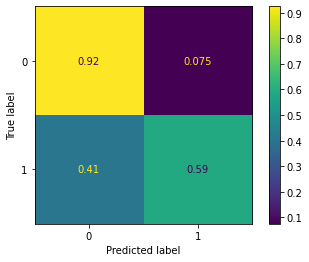

In [ ]:
plot_confusion_matrix(lr, x_test, y_test, normalize='true')  
plt.show()

# OverSampling

In [16]:
#pip install imbalanced-learn --user

In [17]:
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler

from collections import Counter

In [18]:
os =  RandomOverSampler(ratio=1)

In [19]:
x_train_res, y_train_res = os.fit_sample(x_train, y_train)

In [20]:
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 26394, 1: 8750})
Resampled dataset shape Counter({0: 26394, 1: 26394})


### Downloading the two files after resampling

In [21]:
x_train_res.shape, x_train.shape

((52788, 24), (35144, 24))

In [22]:
y_train_res.shape, y_train.shape

((52788,), (35144,))

In [23]:
y_train.head()

0    0
1    1
2    0
3    1
4    1
Name: income, dtype: int64

In [24]:
x_train_res = pd.DataFrame(x_train_res, columns=x_train.columns)

In [25]:
y_train_res = pd.Series(y_train_res)

In [26]:
from google.colab import files

In [27]:
# x_train_res.to_csv('x_train_res.csv', index = False)         
# files.download('x_train_res.csv')

In [28]:
# y_train_res.to_csv('y_train_res.csv', index = False)         
# files.download('y_train_res.csv')

In [29]:
# After restarting the runtime I am loading the files
x_train_res = pd.read_csv('x_train_res.csv')
y_train_res = pd.read_csv('y_train_res.csv', header=None).iloc[:,0]

In [30]:
y_train_res.head()

0    0
1    1
2    0
3    1
4    1
Name: 0, dtype: int64

In [31]:
x_train_res.shape, y_train_res.shape

((52788, 24), (52788,))

## Random Forest after resampling

In [ ]:
rfc.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print(classification_report(y_test,rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      7129
           1       0.67      0.50      0.58      2267

    accuracy                           0.82      9396
   macro avg       0.76      0.71      0.73      9396
weighted avg       0.81      0.82      0.81      9396



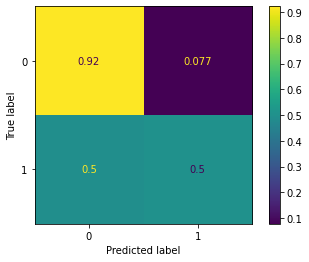

In [ ]:
plot_confusion_matrix(rfc, x_test, y_test, normalize='true')  
plt.show()  

## SVM after resampling

In [ ]:
svc.fit(x_train_res, y_train_res)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(classification_report(y_test,svc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      7129
           1       0.54      0.85      0.66      2267

    accuracy                           0.79      9396
   macro avg       0.74      0.81      0.75      9396
weighted avg       0.84      0.79      0.80      9396



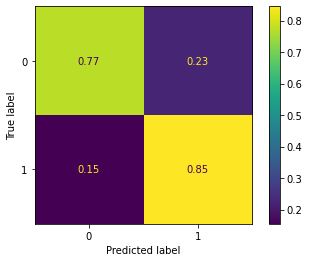

In [ ]:
plot_confusion_matrix(svc, x_test, y_test, normalize='true')  
plt.show()  

## Logistic Regression after resampling

In [ ]:
lr.fit(x_train_res, y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(classification_report(y_test,lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      7129
           1       0.56      0.84      0.67      2267

    accuracy                           0.80      9396
   macro avg       0.75      0.82      0.77      9396
weighted avg       0.85      0.80      0.81      9396



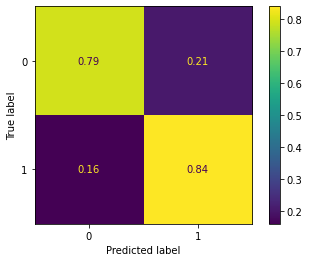

In [ ]:
plot_confusion_matrix(lr, x_test, y_test, normalize='true')  
plt.show()

# Hyperparameter Tuning

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [0.1, 1, 10, 100, 1000], 
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'bootstrap': [True, False],
             'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [200, 400, 600, 800, 1000]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
  #          'C': [1,5,10]
            'penalty' : ['l1', 'l2'],
            'C' : np.logspace(-4, 4, 20)
        }
    }
}

In [ ]:
# scores = []

# for model_name, mp in model_params.items():
#     clf =  RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, n_iter=2)
#     clf.fit(x_train_res, y_train_res)
#     scores.append({
#         'model': model_name,
#         'best_score': clf.best_score_,
#         'best_params': clf.best_params_
#     })
    
# df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
# df

In [ ]:
#df[df['model'] == 'random_forest']['best_params'].values

best parameter for random forest:- {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True} for accuracy 0.8999 on resampled data.

#### Results after hyperparameter tuning first time on resampled data

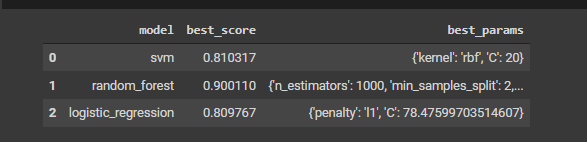

#### Results after hyperparameter tuning second time on non-resampled data

Best parameters for random forest{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': True} without resampling with the score of 0.8422

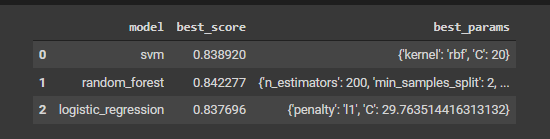

# Checking the  models on resampled data after Hyperparameter Tuning

In [ ]:
rfc_hyper = RandomForestClassifier(n_estimators =  200, 
                                   min_samples_split= 2, 
                                   min_samples_leaf= 1, 
                                   max_features= 'sqrt', 
                                   max_depth= 50, 
                                   bootstrap= True)
rfc_hyper.fit(x_train_res, y_train_res)
print(classification_report(y_test,rfc_hyper.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      7129
           1       0.68      0.51      0.58      2267

    accuracy                           0.82      9396
   macro avg       0.77      0.72      0.74      9396
weighted avg       0.81      0.82      0.82      9396



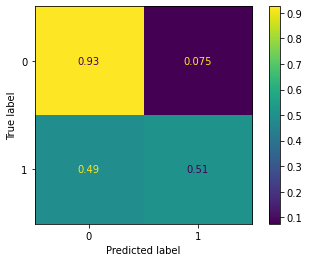

In [ ]:
plot_confusion_matrix(rfc_hyper, x_test, y_test, normalize='true')  
plt.show()

In [ ]:
lr_hyper = LogisticRegression(penalty='l2',
                              C = 78.47599)

lr_hyper.fit(x_train_res, y_train_res)
print(classification_report(y_test,lr_hyper.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      7129
           1       0.56      0.84      0.67      2267

    accuracy                           0.80      9396
   macro avg       0.75      0.81      0.76      9396
weighted avg       0.85      0.80      0.81      9396



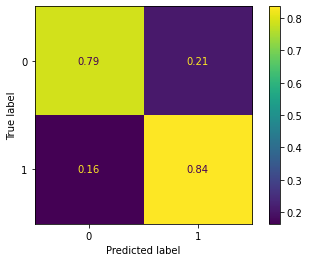

In [ ]:
plot_confusion_matrix(lr_hyper, x_test, y_test, normalize='true')  
plt.show()

In [ ]:
svc_hyper = SVC(kernel='rbf',
          C = 20)

svc.fit(x_train_res, y_train_res)
print(classification_report(y_test,svc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      7129
           1       0.54      0.85      0.66      2267

    accuracy                           0.79      9396
   macro avg       0.74      0.81      0.75      9396
weighted avg       0.84      0.79      0.80      9396



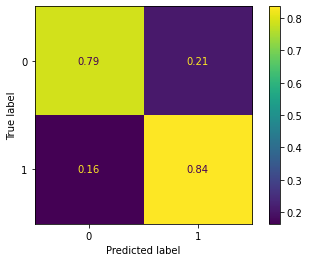

In [ ]:
plot_confusion_matrix(lr_hyper, x_test, y_test, normalize='true')  
plt.show()

# Xgboost

In [36]:
import xgboost

In [ ]:
classifier=xgboost.XGBClassifier()

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]    
}

In [ ]:
#random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

## On Resampled Data

In [ ]:
#random_search.fit(x_train_res,y_train_res)

In [ ]:
#random_search.best_estimator_

In [ ]:
#random_search.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.0,
 'learning_rate': 0.25,
 'max_depth': 8,
 'min_child_weight': 1}

In [ ]:
# xg_res = xgboost.XGBClassifier(colsample_bytree = 0.3,
#                                gamma = 0.0,
#                                learning_rate = 0.25,
#                                max_depth = 8,
#                                min_child_weight = 1)

In [ ]:
#xg_res.fit(x_train_res,y_train_res)

### Saving/Loading the model

In [ ]:
#dump(xg_res, 'xg_res.joblib')

In [ ]:
xg_res = load('xg_res.joblib') 

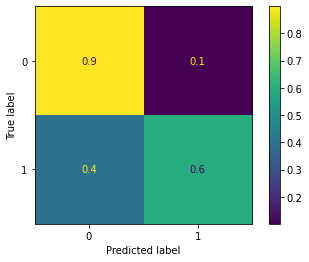

In [ ]:
plot_confusion_matrix(xg_res, x_test, y_test, normalize='true')  
plt.show()

In [ ]:
f1_score(y_test, xg_res.predict(x_test))

0.6252302025782689

## On normal data

In [ ]:
#random_search.fit(x_train,y_train)

In [ ]:
#random_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.4,
 'learning_rate': 0.15,
 'max_depth': 5,
 'min_child_weight': 3}

In [ ]:
# xg_non_res = xgboost.XGBClassifier(colsample_bytree = 0.5,
#                                gamma = 0.4,
#                                learning_rate = 0.15,
#                                max_depth = 5,
#                                min_child_weight = 3)

In [ ]:
# xg_non_res.fit(x_train_res,y_train_res)

### Saving/Loading the model

In [ ]:
#dump(xg_non_res, 'xg_non_res.joblib')

In [ ]:
xg_non_res = load('xg_non_res.joblib') 

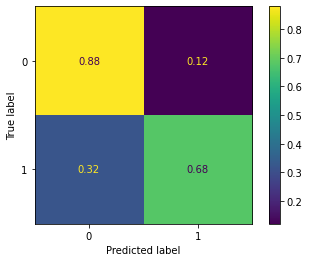

In [ ]:
plot_confusion_matrix(xg_non_res, x_test, y_test, normalize='true')  
plt.show()

In [ ]:
f1_score(y_test, xg_non_res.predict(x_test))

0.6610968294772921

# Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

## Using Default Hyperparameters

In [ ]:
ada = AdaBoostClassifier()

### On Normal Data

In [ ]:
ada.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

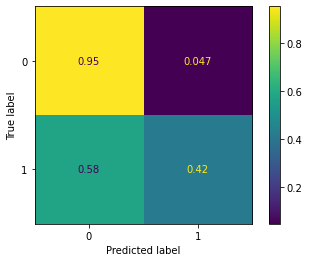

In [ ]:
plot_confusion_matrix(ada, x_test, y_test, normalize='true')  
plt.show()

### On Resampled Data

In [ ]:
ada.fit(x_train_res, y_train_res)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

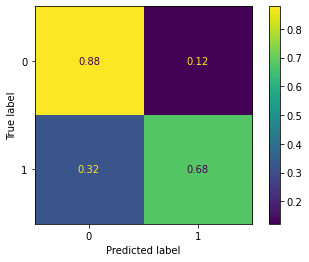

In [ ]:
plot_confusion_matrix(ada, x_test, y_test, normalize='true')  
plt.show()

## After Hyperparameter Tuning

In [ ]:
param_grid = {
    'n_estimators' : [100, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 0.2, 0.5]
}

### On normal data

In [ ]:
gs_ab = GridSearchCV(AdaBoostClassifier(), param_grid = param_grid)

In [ ]:
gs_ab.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
                         'n_estimators': [100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

#### Saving/Loading the model

In [ ]:
#dump(gs_ab, 'ada_non_res.joblib') # on non resampled data

['ada_non_res.joblib']

In [ ]:
ada_non_res = load('ada_non_res.joblib') 

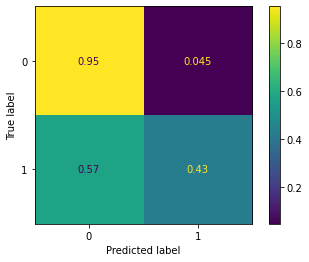

In [ ]:
plot_confusion_matrix(ada_non_res, x_test, y_test, normalize='true')  
plt.show()

In [ ]:
f1_score(y_test, ada_non_res.predict(x_test))

0.544841158279449

### On Resampled Data

In [ ]:
gs_ab.fit(x_train_res, y_train_res)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
                         'n_estimators': [100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

#### Saving/Loading the model

In [ ]:
dump(gs_ab, 'ada_res.joblib')

['ada_res.joblib']

In [ ]:
ada_res = load('ada_res.joblib') 

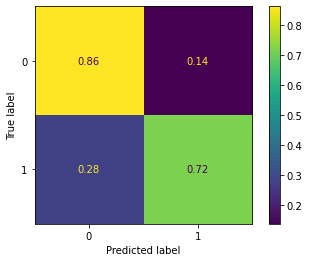

In [ ]:
plot_confusion_matrix(ada_res, x_test, y_test, normalize='true')  
plt.show()

In [ ]:
f1_score(y_test, ada_res.predict(x_test))

0.6663936104853573

# Catboost

In [ ]:
#!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from scipy.stats import randint

In [ ]:
cbc = CatBoostClassifier(eval_metric='F1', task_type= 'GPU', random_state = 2, iterations = 50)

In [ ]:
param_grid = { "learning_rate": np.linspace(0,0.2,5),
               "max_depth": randint(3, 10)}

In [ ]:
rscv = RandomizedSearchCV(cbc , param_grid, scoring='f1', cv =5)

## On normal data

In [ ]:
#rscv.fit(x_train, y_train)

In [ ]:
rscv.best_params_

{'learning_rate': 0.2, 'max_depth': 9}

{'learning_rate': 0.2, 'max_depth': 7} with 50 iterations<br>
'learning_rate': 0.2, 'max_depth': 5 with 100 iterations

In [ ]:
cbc_non_res = CatBoostClassifier(eval_metric='F1', task_type= 'GPU', random_state = 2, 
                                 iterations = 50, learning_rate = 0.2, max_depth = 7)

In [ ]:
#cbc_non_res.fit(x_train, y_train)

0:	learn: 0.5952952	total: 12.3ms	remaining: 601ms
1:	learn: 0.6246407	total: 23.8ms	remaining: 571ms
2:	learn: 0.6289808	total: 35.5ms	remaining: 557ms
3:	learn: 0.6293588	total: 46.9ms	remaining: 540ms
4:	learn: 0.6306755	total: 58.1ms	remaining: 523ms
5:	learn: 0.6340193	total: 69.4ms	remaining: 509ms
6:	learn: 0.6416699	total: 89.8ms	remaining: 552ms
7:	learn: 0.6415119	total: 102ms	remaining: 533ms
8:	learn: 0.6444129	total: 113ms	remaining: 514ms
9:	learn: 0.6435188	total: 124ms	remaining: 497ms
10:	learn: 0.6425927	total: 137ms	remaining: 484ms
11:	learn: 0.6426157	total: 148ms	remaining: 469ms
12:	learn: 0.6465116	total: 159ms	remaining: 454ms
13:	learn: 0.6497004	total: 171ms	remaining: 439ms
14:	learn: 0.6511747	total: 185ms	remaining: 433ms
15:	learn: 0.6515424	total: 197ms	remaining: 418ms
16:	learn: 0.6531659	total: 213ms	remaining: 413ms
17:	learn: 0.6541195	total: 224ms	remaining: 399ms
18:	learn: 0.6551195	total: 236ms	remaining: 385ms
19:	learn: 0.6553289	total: 247ms	

### Saving and loading our work

In [ ]:
dump(cbc_non_res, 'cbc_non_res.joblib')

['cbc_non_res.joblib']

In [ ]:
cbc_non_res = load('cbc_non_res.joblib')

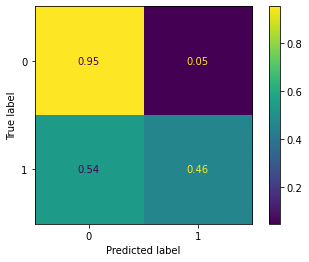

In [ ]:
plot_confusion_matrix(cbc_non_res, x_test, y_test, normalize='true')  
plt.show()

In [ ]:
f1_score(y_test, cbc_non_res.predict(x_test))

0.5679147308007653

It is working better with 50 iterations

## On resampled data

In [ ]:
#rscv.fit(x_train_res, y_train_res)

0:	learn: 0.8227972	total: 12.5ms	remaining: 614ms
1:	learn: 0.8187956	total: 24.4ms	remaining: 585ms
2:	learn: 0.8239710	total: 36ms	remaining: 564ms
3:	learn: 0.8235086	total: 47.5ms	remaining: 546ms
4:	learn: 0.8262179	total: 58.8ms	remaining: 529ms
5:	learn: 0.8253454	total: 70.1ms	remaining: 514ms
6:	learn: 0.8265399	total: 81.5ms	remaining: 500ms
7:	learn: 0.8266922	total: 93ms	remaining: 488ms
8:	learn: 0.8273189	total: 104ms	remaining: 475ms
9:	learn: 0.8269612	total: 116ms	remaining: 462ms
10:	learn: 0.8273248	total: 127ms	remaining: 450ms
11:	learn: 0.8276694	total: 140ms	remaining: 444ms
12:	learn: 0.8286883	total: 152ms	remaining: 432ms
13:	learn: 0.8304096	total: 163ms	remaining: 420ms
14:	learn: 0.8304334	total: 175ms	remaining: 409ms
15:	learn: 0.8309566	total: 187ms	remaining: 397ms
16:	learn: 0.8320975	total: 198ms	remaining: 385ms
17:	learn: 0.8321224	total: 214ms	remaining: 381ms
18:	learn: 0.8319935	total: 224ms	remaining: 366ms
19:	learn: 0.8327199	total: 234ms	rem

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7fa7500e7dd0>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': array([0.  , 0.05, 0.1 , 0.15, 0.2 ]),
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa7646a71d0>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='f1', verbose=0)

In [ ]:
rscv.best_params_

{'learning_rate': 0.2, 'max_depth': 8}

{'learning_rate': 0.1, 'max_depth': 9} for 50 iterations<br>
{'learning_rate': 0.2, 'max_depth': 8} for 70 iterations

### Saving and Loading the model

In [ ]:
dump(cbc_res, 'cbc_res.joblib')

['cbc_res.joblib']

In [ ]:
cbc_res = load('cbc_res.joblib')

In [ ]:
cbc_res = CatBoostClassifier(eval_metric='F1', task_type= 'GPU', random_state = 2, 
                                 iterations = 50, learning_rate = 0.1, max_depth = 9)

In [ ]:
cbc_res.fit(x_train_res, y_train_res)

0:	learn: 0.8219711	total: 25.6ms	remaining: 1.26s
1:	learn: 0.8238210	total: 50.1ms	remaining: 1.2s
2:	learn: 0.8261915	total: 74.6ms	remaining: 1.17s
3:	learn: 0.8279032	total: 98.9ms	remaining: 1.14s
4:	learn: 0.8275335	total: 131ms	remaining: 1.18s
5:	learn: 0.8285923	total: 160ms	remaining: 1.17s
6:	learn: 0.8293057	total: 185ms	remaining: 1.14s
7:	learn: 0.8292361	total: 210ms	remaining: 1.1s
8:	learn: 0.8295467	total: 237ms	remaining: 1.08s
9:	learn: 0.8296828	total: 262ms	remaining: 1.05s
10:	learn: 0.8306111	total: 285ms	remaining: 1.01s
11:	learn: 0.8315017	total: 310ms	remaining: 981ms
12:	learn: 0.8314140	total: 326ms	remaining: 928ms
13:	learn: 0.8314168	total: 342ms	remaining: 879ms
14:	learn: 0.8315360	total: 358ms	remaining: 835ms
15:	learn: 0.8333244	total: 377ms	remaining: 800ms
16:	learn: 0.8334408	total: 393ms	remaining: 762ms
17:	learn: 0.8337902	total: 408ms	remaining: 726ms
18:	learn: 0.8347599	total: 424ms	remaining: 692ms
19:	learn: 0.8356653	total: 445ms	remai

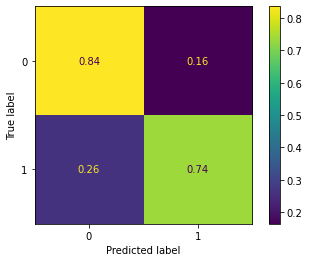

In [ ]:
plot_confusion_matrix(cbc_res, x_test, y_test, normalize='true')  
plt.show()

In [ ]:
f1_score(y_test, cbc_res.predict(x_test))

0.6540117416829746

It is working fine with 50 iterations

# LightGBM

In [ ]:
#!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
model = LGBMClassifier()

In [ ]:
param_grid = {
 #   'learning_rate' : np.random.uniform(0, 1),
    'boosting_type' : np.random.choice(['gbdt', 'dart', 'goss']),
    'min_data' : np.random.randint(10, 100),
    'max_depth' : np.random.randint(5, 200)
}

In [ ]:
lgb = RandomizedSearchCV(model, param_grid, scoring='f1', cv =5 )

## On normal Data

In [ ]:
lgb.fit(x_train, y_train)

TypeError: ignored

# Feature Selection

In [34]:
#!pip install boruta

In [35]:
from boruta import BorutaPy

## On Resampled Data

In [44]:
forest = RandomForestClassifier(n_jobs=-1, max_depth=5, random_state=1)

In [46]:
boruta_selector.fit(np.array(x_train_res), np.array(y_train_res))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	21
Tentative: 	3
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	21
Tentative: 	3
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	21
Tentative: 	3
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	21
Tentative: 	3
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	21
Tentative: 	3
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	21
Tentative: 	3
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	21
Tentative: 	3
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	21
Tentative: 	3
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	21
Tentative: 	3
Rejected: 	0
I

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=5, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=132, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7F9C357C49E0,
                                          verbose=0, warm_start=False),
         max_iter=100, n_estimators='aut

In [47]:
selected_rfe_features = pd.DataFrame({'Feature':list(x_train_res.columns),
'Ranking':boruta_selector.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,age,1
21,occupation_Transport-moving,1
19,occupation_Sales,1
18,occupation_Prof-specialty,1
17,occupation_Other-service,1
16,occupation_Machine-op-inspct,1
15,occupation_Handlers-cleaners,1
14,occupation_Farming-fishing,1
13,occupation_Exec-managerial,1
12,occupation_Craft-repair,1


### Creating a new subset of the data using the selected features

In [61]:
x_important_train = x_train_res.drop(['occupation_Tech-support','race_Other'], axis = 'columns')
x_important_test =  x_test.drop(['occupation_Tech-support','race_Other'], axis = 'columns')

In [55]:
xgb = xgboost.XGBClassifier(colsample_bytree = 0.3,
                               gamma = 0.0,
                               learning_rate = 0.25,
                               max_depth = 8,
                               min_child_weight = 1)

In [57]:
xgb.fit(x_important_train, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0,
              learning_rate=0.25, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

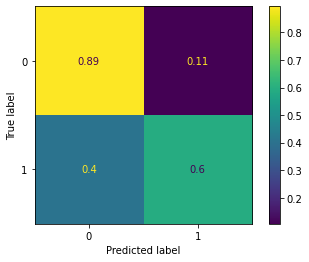

In [62]:
plot_confusion_matrix(xgb, x_important_test, y_test, normalize='true')  
plt.show()

In [60]:
x_test.shape, x_important_test.shape

((9396, 24), (52788, 22))

In [63]:
f1_score(y_test, xgb.predict(x_important_test))

0.6179569399908383

After Feature selection, my score F1 score was reduced a little bit